# Predicting Airlines Ticket Price using Machine Learning

In [134]:
#import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
#import data

train_data = pd.read_excel('Data_Train.xlsx')

In [136]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [137]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [138]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


After loading data, we check for null values in rows/columns.

If null values are present, then we can do following:

    a) filling NaN values with mean, medium, mode using fillna() method
    b) if very few missing values are there, we can drop these aas well.

In [139]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [140]:
train_data.shape

(10683, 11)

In [141]:
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


As we can see, only 1 missing value is there, hence we can drop it.

In [142]:
train_data.dropna(inplace=True)

In [143]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Pre-processing and featurizing 'Date_of_Journey'

i.e. pre-process it and extract date, month, year from 'Date_of_Journey' feature

In [144]:
data = train_data.copy()

In [145]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [146]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

We can see 'Date_of_Journey' feature is of object type, we need to convert it into timestamp because our model will not be able to understand string literal, so let's convert it into timestamp.

To do this we require pandas to_datetime to convert object data type to datetime dtype. 

In [147]:
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [148]:
n = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']
result = map(change_into_datetime, n)

In [149]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

In [150]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [151]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-09-15 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-15 05:50:00,2022-09-15 13:15:00,7h 25m,2 stops,No info,7662


In [152]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [153]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

We observed that the given data belongs to year 2019 only, hence extracting year feature and using it as an input to our
machine learning model makes no sense.

But if the dataset includes more than one year, then it may impact.

### Feature Engineering of "Date_of_Journey" and extracting day, month, year features

In [154]:
#define a fuction to extract day, month,year

def extract_day_month_year(col):
    data['Journey_day'] = data[col].dt.day
    data['Journey_month'] = data[col].dt.month
    data['Journey_year'] = data[col].dt.year

In [155]:
extract_day_month_year('Date_of_Journey')

In [156]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-09-15 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-15 05:50:00,2022-09-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [157]:
data.drop('Date_of_Journey', axis=1, inplace=True)

In [158]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-09-15 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-15 05:50:00,2022-09-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


### Let's clean and featurize 'Dep_Time' and 'Arrival_Time'

In [159]:
# define a function to extract hour and minute

def extract_hour_minute(col):
    data[col+'_hour'] = data[col].dt.hour
    data[col+'_minute'] = data[col].dt.minute
    data.drop(col, axis=1, inplace=True)  #droppping columns 

In [160]:
for feature in ['Dep_Time', 'Arrival_Time']:
    extract_hour_minute(feature)

In [161]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


### Analyzing when most flights will take off

In [162]:
#let's define a function to convert the flight Dep_Time into mid_night, morning, afternoon and evening time

def flight_dep_time(x):
    
    if (x>4) and (x<=8):
        return "Early morning"
    
    elif (x>8) and (x<=12):
        return "Morning"
    
    if (x>12) and (x<=16):
        return "Noon"
    
    if (x>16) and (x<=20):
        return "Evening"
    
    if (x>20) and (x<=24):
        return "Night"
    
    else:
        return "Late night"
    
#This function takes flight departure time and convert into appropriate format

<AxesSubplot:>

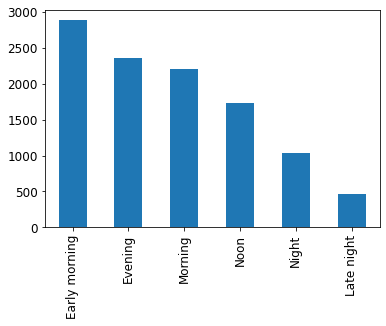

In [163]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

Similarly, we can represent this data on a pie chart or a donut chart

<AxesSubplot:ylabel='Dep_Time_hour'>

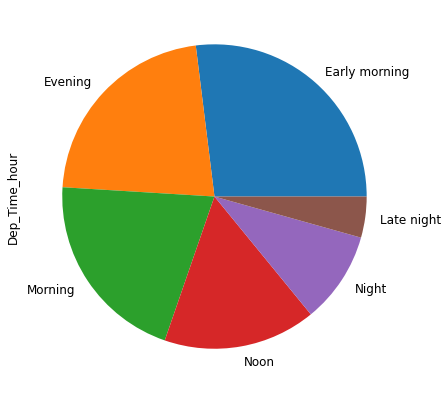

In [164]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='pie', figsize=(7,7))

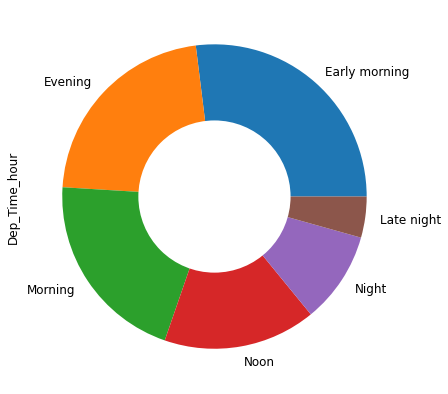

In [165]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='pie', figsize=(7,7))

centre_circle = plt.Circle((0,0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

### Using cufflinks and plotly to make our visuals more interactive

In [166]:
#To download plotly --->  !pip  install plotly
#To download plotly --->  !pip install cufflinks

In [167]:
#Now let's use Plotly interactive plots directly with pandas dataframes after setting up.

import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [168]:
cf.go_offline()

In [169]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

### Let's Pre-process Duration feature and extract meaningful features 

Let's pre-process Duration feature and extract duration hours and minutes from this feature

As our ML model does not understand this duration since it contains string values, so we need to add new features Duration_hour and Duration_minute for our ML model to understand the data.

In [170]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [171]:
#define a function to preprocess Duration feature i.e. add hour or minute if these are missing at any place.

def preprocess_duration(x):
    if 'h' not in x:
        x = '0h '+x
    elif 'm' not in x:
        x = x+' 0m'
    return x

In [172]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [173]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

Now extract duration hour and minute

In [174]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [175]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [176]:
data['Duration_hours'] = data['Duration'].apply(lambda x:int(x.split(' ')[0][:-1]))

In [177]:
data['Duration_minutes'] = data['Duration'].apply(lambda x:int(x.split(' ')[1][:-1]))

In [178]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


### Let's analyze whether Duration impacts on Price or not?

In [179]:
#firstly, let's get total duration in minutes using eval function

data['Duration_total_minutes'] = data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [180]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


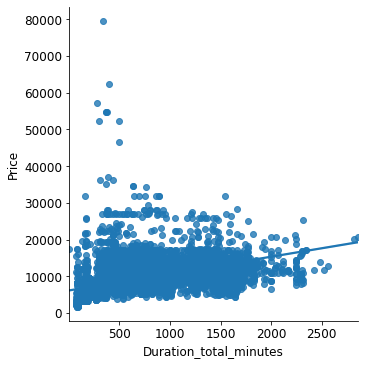

In [181]:
#Now we will use lmplot() method to observe the impact of Duration on Price

sns.lmplot(x='Duration_total_minutes', y='Price', data=data)

We can see from the above plot that as the duration increases flight price also increases.

### Let's find out which city has maximum final destination of flights

In [182]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<AxesSubplot:ylabel='Destination'>

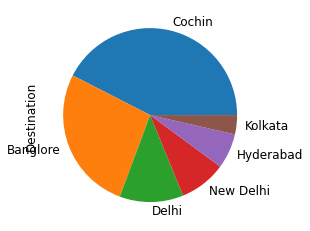

In [183]:
data['Destination'].value_counts().plot(kind='pie')

Final destination of majority of flights is Cochin.

Also, there are two values for Delhi destination which we will correct as we go along.

### Let's perform Exploratory Data  Analysis (Bivariate Analysis) to come up with some business insights  

Problem statement --> On which route Jet Airways is extremely used?

In [184]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [185]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

Similarly, we can explore this for other airlines.

### Airline vs Price Analysis 

i.e. finding price distribution and 5-point summary of each Airline.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

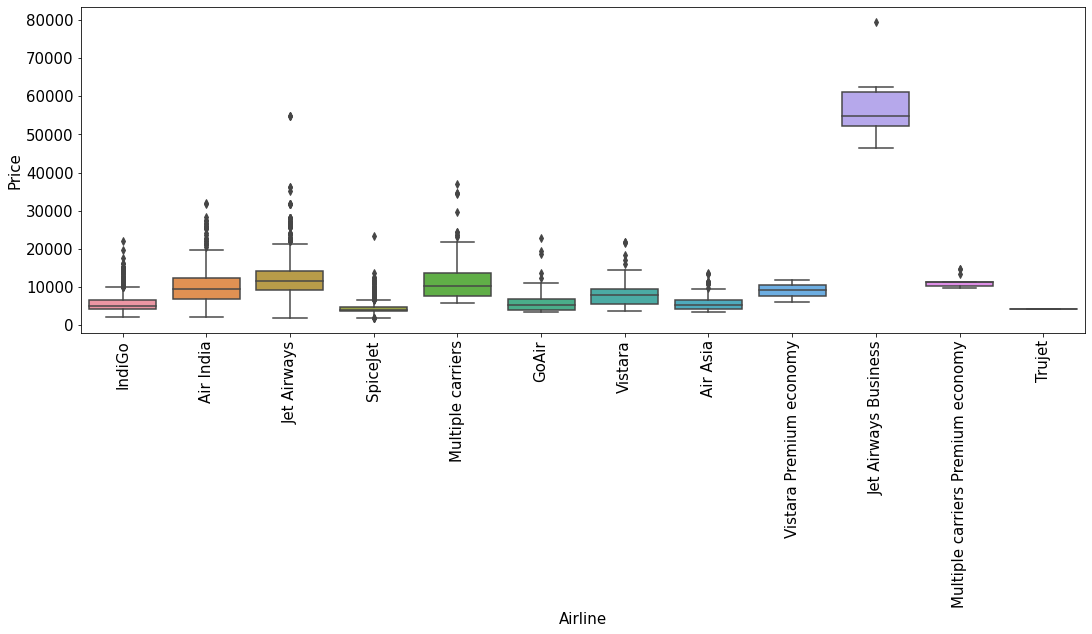

In [186]:
plt.figure(figsize=(18,6))
plt.rcParams['font.size']=15
sns.boxplot(x='Airline', y='Price', data=data)
plt.xticks(rotation='vertical')

Conclusion: From the above plot we can see that Jet Airways Business airline has the highest price.

In [187]:
#when we need boxplot and distribution both, its good to consider violinplot.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

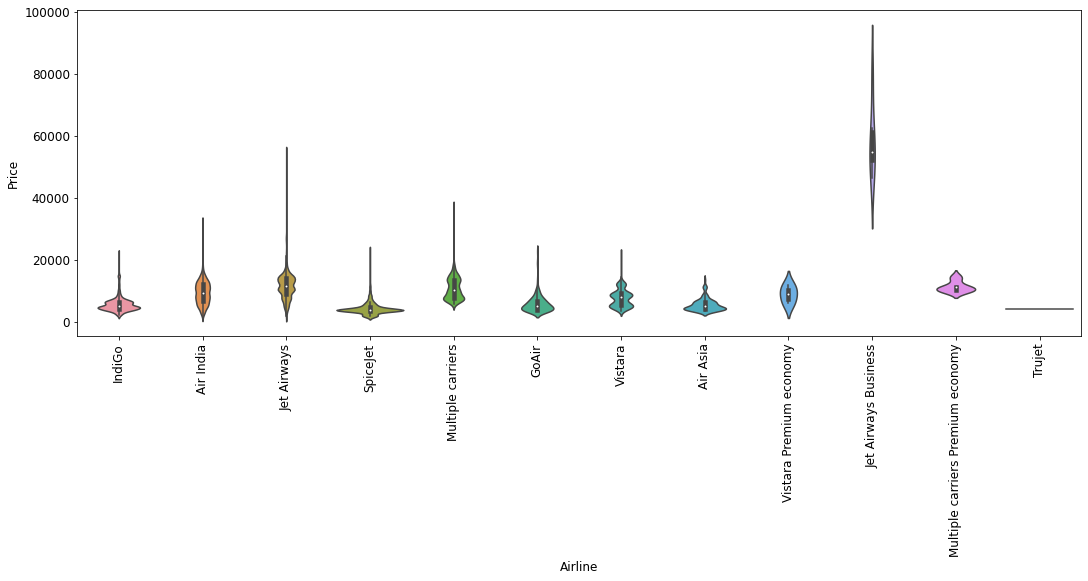

In [188]:
plt.figure(figsize=(18,6))
plt.rcParams['font.size']=12
sns.violinplot(x='Airline', y='Price', data=data)
plt.xticks(rotation='vertical')

### Now let's perform Feature-encoding on data

In [189]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


In [190]:
#firstly, let's remove unnecessary features from data

In [191]:
np.round(data['Additional_Info'].value_counts()/len(data)*100, 2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
2 Long layover                   0.01
1 Short layover                  0.01
Red-eye flight                   0.01
Name: Additional_Info, dtype: float64

In [192]:
#Additional_Info contains almost 80% no_info, so we can drop this column.
#We can drop Route column also as Total_stops provides us with no. of stops, so Route info is not required.
#Let's drop Duration_total_minutes as we have already extracted Duration_hour and Duration_minutes.

data.drop(columns=['Additional_Info', 'Route', 'Duration_total_minutes', 'Journey_year'], axis=1,inplace= True)

In [193]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minutes'],
      dtype='object')

In [194]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25


### Let's separate categorical data and numerical data 

Categorical data are those whose data-type is 'object'.

Numerical data are those whose data-type is either int or float.

In [195]:
cat_col = [col for col in data.columns if data[col].dtypes=='object']

In [196]:
num_col = [col for col in data.columns if data[col].dtypes!='object']

In [197]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [198]:
num_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_minutes']

### Handling Categorical data 

    We will be using 2 basic encoding techniques to convert categorical data to some numerical format.
    If data belongs to Nominal data (i.e. data is not in any order), then we will use one-hot encoder in this case.
    If data belongs to Ordinal data (i.e. data is in order), then we will use label encoder in this case.
    
    But in real world, it is not necessary that we always use one-hot or label.

### Let's apply one-hot encoding on 'Source' feature 

In [199]:
# One-hot from scratch:

In [200]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [201]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [202]:
for category in data['Source'].unique():
    data['Source_'+category] = data['Source'].apply(lambda x: 1 if x==category else 0)

In [203]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0


### Performing Target Guided Mean Encoding 

Again we can use one-hot encoding, but if we have lots of sub-categories, then it creates curse of dimensionality  in ML.

To overcome this, we will use Target Guided Encoding.

In [204]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [205]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [206]:
dict1 = {key:index for index,key in enumerate(airlines,0)}

In [207]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [208]:
data['Airline']=data['Airline'].map(dict1)

In [209]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [210]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [211]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

As we know, till now Delhi has only one airport, so we will consider Delhi and New Delhi as same.

In [212]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [213]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [214]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [215]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [216]:
dict2 = {key:index for index,key in enumerate(dest,0)}

In [217]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [218]:
data['Destination'] = data['Destination'].map(dict2)

In [219]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [220]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


### Manual Encoding on Total_Stops feature 

In [221]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [222]:
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [223]:
data['Total_Stops'] = data['Total_Stops'].map(stops)

In [224]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [225]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


### Performing Outliers Detection

To spot outliers in the data, we can use following data visualization plots:
1. Box plot
2. Scatter plot
3. Histogram
4. Distibution plot
5. QQ plot

Cause for Outliers:

*Data entry error: Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.

*Measurement error: It is the most common cause source of outliers. This is caused when measurement instrument used truns out to be faulty.

*Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. Most of real world data belong to this category.

In [226]:
def plot(df, col):
    fig,(ax1,ax2,ax3) = plt.subplots(3,1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.histplot(df[col], ax=ax3)

C:\Users\UC17\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\UC17\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



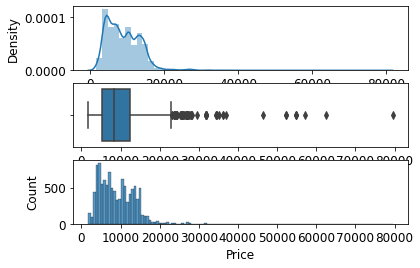

In [227]:
plot(data, 'Price')

### Dealing with outliers

There are various ways to deal with outliers, we will be using statistical imputation i.e. impute it with mean, median or mode of data.

In [228]:
data['Price'] = np.where(data['Price']>=35000, data['Price'].median(), data['Price'])

C:\Users\UC17\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\UC17\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



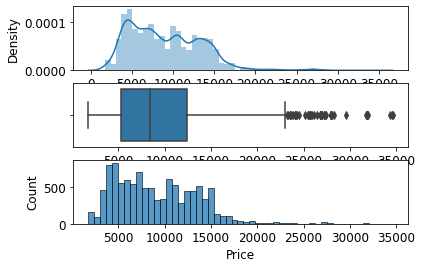

In [229]:
plot(data, 'Price')

In [230]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [231]:
data.drop(columns=['Source', 'Duration'], axis=1, inplace=True)

In [232]:
data.head(2)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [233]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
Journey_day              int64
Journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_minutes         int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

### Performing Feature Selection 

Finding out the best features which will contribute most to the target variable.

We will be using mutual_info_regression technique to determine the connection between the given features and the target.

In [234]:
from sklearn.feature_selection import mutual_info_regression

In [235]:
X = data.drop('Price', axis=1)

In [236]:
y = data['Price']

In [237]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Journey_day            int64
Journey_month          int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Duration_hours         int64
Duration_minutes       int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [238]:
mutual_info_regression(X, y)

array([0.97350202, 1.00768955, 0.78367446, 0.19215706, 0.22842251,
       0.33779416, 0.25059727, 0.40301551, 0.34999036, 0.4612212 ,
       0.34311935, 0.39243135, 0.45756077, 0.51225099, 0.128982  ,
       0.19900133])

In [239]:
imp = pd.DataFrame(mutual_info_regression(X, y), index=X.columns)
imp.columns = ['Importance']

In [240]:
imp.sort_values(by='Importance',ascending=False)

,Importance
Destination,1.005469
Airline,0.976340
Total_Stops,0.792059
Source_Delhi,0.512403
Duration_hours,0.478572
Source_Kolkata,0.455994
Arrival_Time_hour,0.404293
Source_Banglore,0.389224
Arrival_Time_minute,0.355005
Duration_minutes,0.345214


### Let's build ML Model 

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [243]:
from sklearn.ensemble import RandomForestRegressor

In [244]:
rf_model = RandomForestRegressor()

In [245]:
model = rf_model.fit(X_train, y_train)

In [246]:
y_pred = model.predict(X_test)

In [247]:
y_pred

array([16784.42,  6277.19,  8884.31, ...,  3480.38,  6400.36,  6918.09])

In [248]:
y_pred.shape

(2671,)

In [249]:
len(X_test)

2671

### Saving the Model 

Let's dump our ML model using pickle and joblib.

Advantage of dumping: Suppose in future we have new data, and we are required to predict price on this huge data,
then just for this new data, we have to execute all the above cells and follow the entire pipeline, then only we are able to predict on this....

So to get rid of such issue, we will just dump it to resuse again and again.

The file stores coefficients of our model, not an entire dataset.

In [250]:
# !pip install pickle

In [251]:
import pickle

In [252]:
file = open(r'C:\Users\UC17\Desktop\DS, ML Projects\rf_random.pkl', 'wb')

In [253]:
pickle.dump(model, file)

In [254]:
model = open(r'C:\Users\UC17\Desktop\DS, ML Projects\rf_random.pkl', 'rb')

In [255]:
forest = pickle.load(model)

In [256]:
forest.predict(X_test)

array([16784.42,  6277.19,  8884.31, ...,  3480.38,  6400.36,  6918.09])

### Defining our own Evaluation metric

In [261]:
def mape(y_true,y_pred):
    y_true,y_pred = np.array(y_true), np.array(y_pred)
    
    return np.mean(np.abs(y_true-y_pred)/y_true)*100

In [262]:
mape(y_test, y_pred)

13.238356462196238

### How to Automate ML Pipeline 

In [270]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    print('Predictions are: {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score = metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE: ',metrics.mean_squared_error(y_test,y_prediction))
    print('MAE: ',metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE: ',mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)
    

Training_score: 0.9517939711083477
Predictions are: [16728.49  6438.39  8819.93 ...  3499.85  6221.91  7043.05]


r2_score: 0.8053457770347963
MSE:  3789450.485871965
MAE:  1187.1716126921458
RMSE:  1946.6510950532365
MAPE:  13.27140713985536


C:\Users\UC17\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



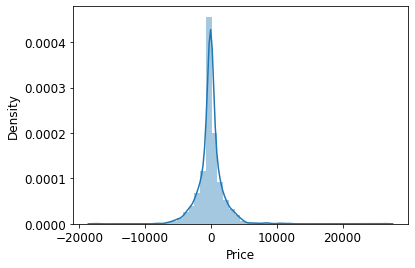

In [271]:
predict(RandomForestRegressor())

We can see in most cases our predictions matches the true value.